In [1]:
import argparse
import os
import pickle
import time
from itertools import product
from math import inf, pi

import jax
import jax.numpy as jnp
from jax.experimental.ode import odeint
import jax.debug as jdb

import numpy as np

from tqdm.auto import tqdm

from dynamics import prior, disturbance, plant
from utils import params_to_posdef
from utils import random_ragged_spline, spline
from utils import (tree_normsq, rk38_step, epoch,   # noqa: E402
                   odeint_fixed_step, random_ragged_spline, spline,
            params_to_cholesky, params_to_posdef)

from functools import partial
import matplotlib.pyplot as plt
import csv

In [2]:
with open('training_data_hexarotor.pkl', 'rb') as f:
        traj = pickle.load(f)

In [13]:
traj['u'].shape

(2, 3001, 3)

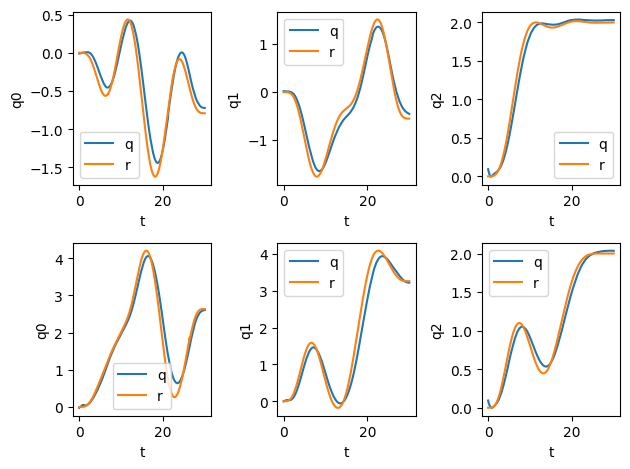

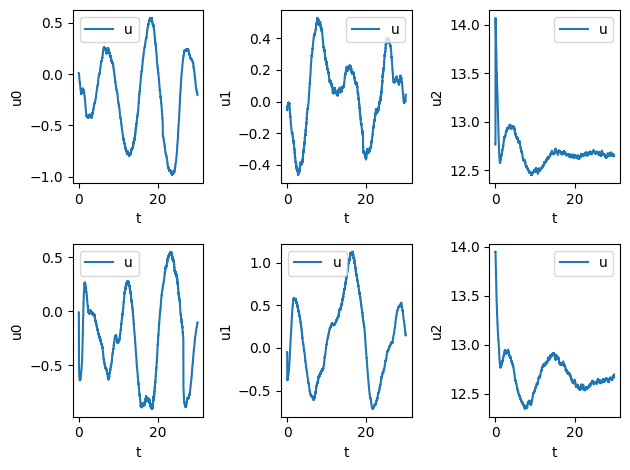

In [15]:
fig, ax = plt.subplots(2, 3)
for j in range(2):
    for i in range(3):
        ax[j, i].plot(traj['t'], traj['q'][j, :, i], label='q')
        ax[j, i].plot(traj['t'], traj['r'][j, :, i], label='r')
        ax[j, i].legend()
        ax[j, i].set_ylabel(f'q{i}')
        ax[j, i].set_xlabel('t')
fig.tight_layout()

fig, ax = plt.subplots(2, 3)
for j in range(2):
    for i in range(3):
        ax[j, i].plot(traj['t'], traj['u'][j, :, i], label='u')
        ax[j, i].legend()
        ax[j, i].set_ylabel(f'u{i}')
        ax[j, i].set_xlabel('t')
fig.tight_layout()